# Coursework 1: Image filtering

In this coursework you will practice techniques for image filtering. The coursework includes coding questions and written questions. Please read both the text and the code in this notebook to get an idea what you are expected to implement.

## What to do?

* Complete and run the code using `jupyter-lab` or `jupyter-notebook` to get the results.

* Export (File | Save and Export Notebook As...) the notebook as a PDF file, which contains your code, results and answers, and upload the PDF file onto [Scientia](https://scientia.doc.ic.ac.uk).

* Instead of clicking the Export button, you can also run the following command instead: `jupyter nbconvert coursework_01_solution.ipynb --to pdf`

* If Jupyter complains about some problems in exporting, it is likely that pandoc (https://pandoc.org/installing.html) or latex is not installed, or their paths have not been included. You can install the relevant libraries and retry. Alternatively, use the Print function of your browser to export the PDF file.

* If Jupyter-lab does not work for you at the end (we hope not), you can use Google Colab to write the code and export the PDF file.

## Dependencies:

You need to install Jupyter-Lab (https://jupyterlab.readthedocs.io/en/stable/getting_started/installation.html) and other libraries used in this coursework, such as by running the command:
`pip3 install [package_name]`


In [3]:
# Import libaries (provided)
import imageio.v3 as imageio
import numpy as np
import matplotlib.pyplot as plt
import noise
import scipy
import scipy.signal as signal
import math
import time
from scipy.ndimage import convolve

## 1. Moving average filter (20 points).

Read the provided input image, add noise to the image and design a moving average filter for denoising.

You are expected to design the kernel of the filter and then perform 2D image filtering using the function `scipy.signal.convolve2d()`.

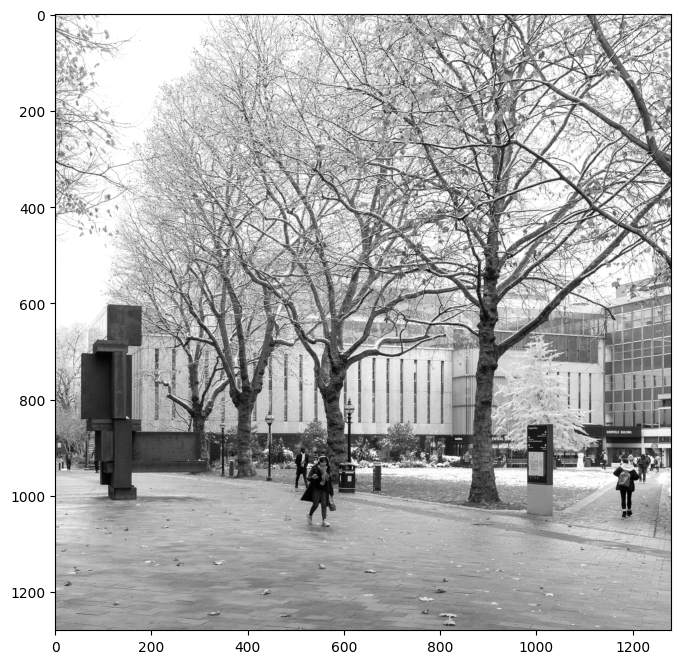

In [6]:
# Read the image (provided)
image = imageio.imread('campus_snow.jpg')
plt.imshow(image, cmap='gray')
plt.gcf().set_size_inches(8, 8)

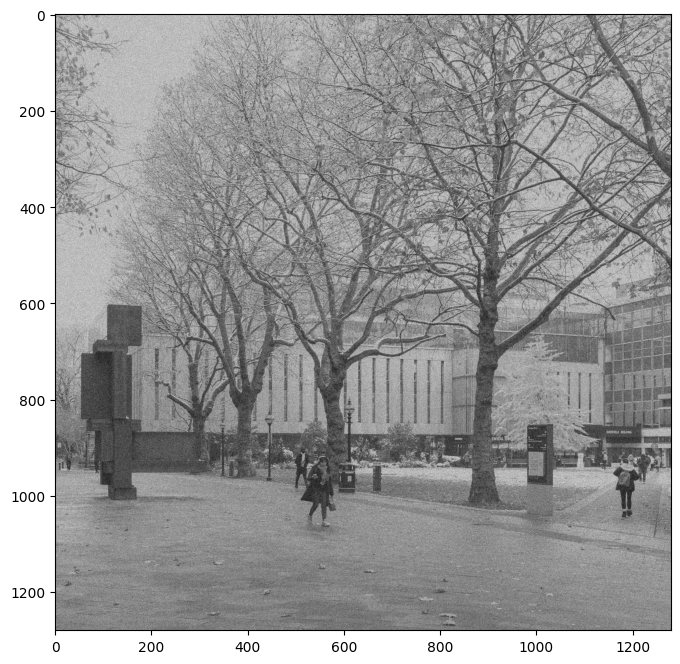

In [7]:
# Corrupt the image with Gaussian noise (provided)
def add_gaussian_noise(image, noise_type='gaussian', mean=0, std=25):

    if noise_type == 'gaussian':
        row, col = image.shape
        gauss = np.random.normal(mean, std, (row, col))
        noisy = image + gauss
        return noisy

#add Gaussian noise
image_noisy = add_gaussian_noise(image)

#display the noisy image
plt.imshow(image_noisy, cmap='gray')
plt.gcf().set_size_inches(8, 8)


### Note: from now on, please use the noisy image as the input for the filters.

### 1.1 Filter the noisy image with a 3x3 moving average filter. Show the filtering results.

In [6]:
# Design the filter h
h = np.ones((3, 3), dtype=np.float32) / 9

# Convolve the corrupted image with h using scipy.signal.convolve2d function
image_filtered = signal.convolve2d(image_noisy, h, mode='same', boundary='symm')

# Print the filter (provided)
print('Filter h:')
print(h)

# Display the filtering result (provided)
plt.imshow(image_filtered, cmap='gray')
plt.gcf().set_size_inches(8, 8)


Filter h:
[[0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]]


### 1.2 Filter the noisy image with a 11x11 moving average filter.

In [7]:
#design the filter h
h = np.ones((11, 11), dtype=np.float32) / 121

#convolve the corrupted image with h using scipy.signal.convolve2d function
image_filtered = signal.convolve2d(image_noisy, h, mode='same', boundary='symm')

# Print the filter (provided)
print('Filter h:')
print(h)

# Display the filtering result (provided)
plt.imshow(image_filtered, cmap='gray')
plt.gcf().set_size_inches(8, 8)


Filter h:
[[0.00826446 0.00826446 0.00826446 0.00826446 0.00826446 0.00826446
  0.00826446 0.00826446 0.00826446 0.00826446 0.00826446]
 [0.00826446 0.00826446 0.00826446 0.00826446 0.00826446 0.00826446
  0.00826446 0.00826446 0.00826446 0.00826446 0.00826446]
 [0.00826446 0.00826446 0.00826446 0.00826446 0.00826446 0.00826446
  0.00826446 0.00826446 0.00826446 0.00826446 0.00826446]
 [0.00826446 0.00826446 0.00826446 0.00826446 0.00826446 0.00826446
  0.00826446 0.00826446 0.00826446 0.00826446 0.00826446]
 [0.00826446 0.00826446 0.00826446 0.00826446 0.00826446 0.00826446
  0.00826446 0.00826446 0.00826446 0.00826446 0.00826446]
 [0.00826446 0.00826446 0.00826446 0.00826446 0.00826446 0.00826446
  0.00826446 0.00826446 0.00826446 0.00826446 0.00826446]
 [0.00826446 0.00826446 0.00826446 0.00826446 0.00826446 0.00826446
  0.00826446 0.00826446 0.00826446 0.00826446 0.00826446]
 [0.00826446 0.00826446 0.00826446 0.00826446 0.00826446 0.00826446
  0.00826446 0.00826446 0.00826446 0.008

### 1.3 Comment on the filtering results. How do different kernel sizes influence the filtering results?

Larger kernel sizes tend to result in more smoothing or blurring of the image. 
Therefore, the 11x11 filter in this case produces a more blurry picture than the 3x3 filter.
The 11x11 seems to reduce more noise but as this removes important details resulting in blurring.

## 2. Edge detection (56 points).

Perform edge detection using Sobel filtering, as well as Gaussian + Sobel filtering.

### 2.1 Implement 3x3 Sobel filters and convolve with the noisy image.

In [8]:
# Design the filters
sobel_x = np.array([[1, 0, -1], [2, 0, -2], [1, 0, -1]])
sobel_y = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]])

# Image filtering - convolving the noisy image with the sobel filter
gradient_x = convolve(image_noisy, sobel_x)
gradient_y = convolve(image_noisy, sobel_y)

# Calculate the gradient magnitude
grad_mag = np.sqrt(gradient_x**2 + gradient_y**2)

# Print the filters (provided)
print('sobel_x:')
print(sobel_x)
print('sobel_y:')
print(sobel_y)

# Display the magnitude map (provided)
plt.imshow(grad_mag, cmap='gray')
plt.gcf().set_size_inches(8, 8)


sobel_x:
[[ 1  0 -1]
 [ 2  0 -2]
 [ 1  0 -1]]
sobel_y:
[[ 1  2  1]
 [ 0  0  0]
 [-1 -2 -1]]


### 2.2 Implement a function that generates a 2D Gaussian filter given the parameter $\sigma$.

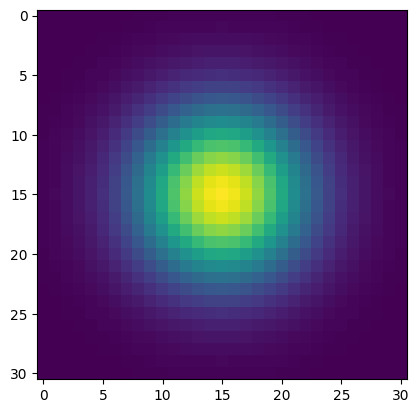

In [22]:
# Design the Gaussian filter
def gaussian_filter_2d(sigma):
    # sigma: the parameter sigma in the Gaussian kernel (unit: pixel)
    size = int(6 * sigma + 1)
    # generate a 1D Gaussian kernel, sum of elements eqqual to 1
    kernel_1d = np.linspace(-(size // 2), size // 2, size)
    kernel_1d = np.exp(-0.5 * (kernel_1d / sigma)**2)
    kernel_1d = kernel_1d / np.sum(kernel_1d)
    # return: a 2D array for the Gaussian kernel by outer product of the 1D kernel with itself
    h = np.outer(kernel_1d, kernel_1d)
    
    return h

# Visualise the Gaussian filter when sigma = 5 pixel (provided)
sigma = 5
h = gaussian_filter_2d(sigma)
plt.imshow(h)


### 2.3 Perform Gaussian smoothing ($\sigma$ = 5 pixels) and evaluate the computational time for Gaussian smoothing. After that, perform Sobel filtering and show the gradient magintude map.

In [17]:
# Construct the Gaussian filter
sigma_gaussian = 5
gaussian_filter = gaussian_filter_2d(sigma_gaussian)

# Perform Gaussian smoothing and count time
start_time = time.time()
image_smoothed = convolve(image_noisy, gaussian_filter, mode='nearest')
end_time = time.time()
print(f"Gaussian smoothing time: {end_time - start_time} seconds")

# Image filtering
sobel_x = np.array([[1, 0, -1], [2, 0, -2], [1, 0, -1]])
sobel_y = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]])

# Calculate the gradient magnitude
gradient_x = convolve(image_smoothed, sobel_x)
gradient_y = convolve(image_smoothed, sobel_y)
grad_mag = np.sqrt(gradient_x**2 + gradient_y**2)

# Display the gradient magnitude map (provided)
plt.imshow(grad_mag, cmap='gray', vmin=0, vmax=100)
plt.gcf().set_size_inches(8, 8)

Gaussian smoothing time: 1.3551921844482422 seconds


### 2.4 Implement a function that generates a 1D Gaussian filter given the parameter $\sigma$. Generate 1D Gaussian filters along x-axis and y-axis respectively.

Text(0.5, 1.0, 'Gaussian filter along y-axis')

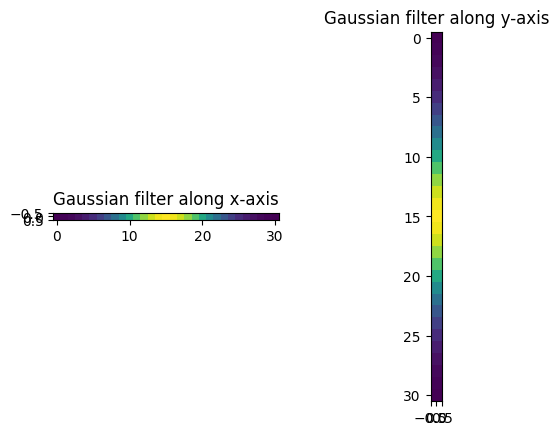

In [21]:
def gaussian_filter_1d(sigma):
    # sigma: the parameter sigma in the Gaussian kernel (unit: pixel)
    size = int(6 * sigma + 1)
    
    # Generate a 1D Gaussian kernel
    kernel_1d = np.linspace(-(size // 2), size // 2, size)
    kernel_1d = np.exp(-0.5 * (kernel_1d / sigma)**2)
    kernel_1d = kernel_1d / np.sum(kernel_1d)
    
    return kernel_1d
# sigma = 5 pixel (provided)
sigma = 5

# The Gaussian filter along x-axis. Its shape is (1, sz).
h_x = gaussian_filter_1d(sigma)
h_x = h_x.reshape(1, -1)

# The Gaussian filter along y-axis. Its shape is (sz, 1).
h_y = gaussian_filter_1d(sigma)
h_y = h_y.reshape(-1, 1)

# Visualise the filters (provided)
plt.subplot(1, 2, 1)
plt.imshow(h_x)
plt.title('Gaussian filter along x-axis')
plt.subplot(1, 2, 2)
plt.imshow(h_y)
plt.title('Gaussian filter along y-axis')


### 2.6 Perform Gaussian smoothing ($\sigma$ = 5 pixels) using two separable filters and evaluate the computational time for separable Gaussian filtering. After that, perform Sobel filtering, show the gradient magnitude map and check whether it is the same as the previous one without separable filtering.

Separable Gaussian smoothing time: 0.08577322959899902 seconds
Mean difference between gradient magnitude maps: 4.3105217525240294e-13


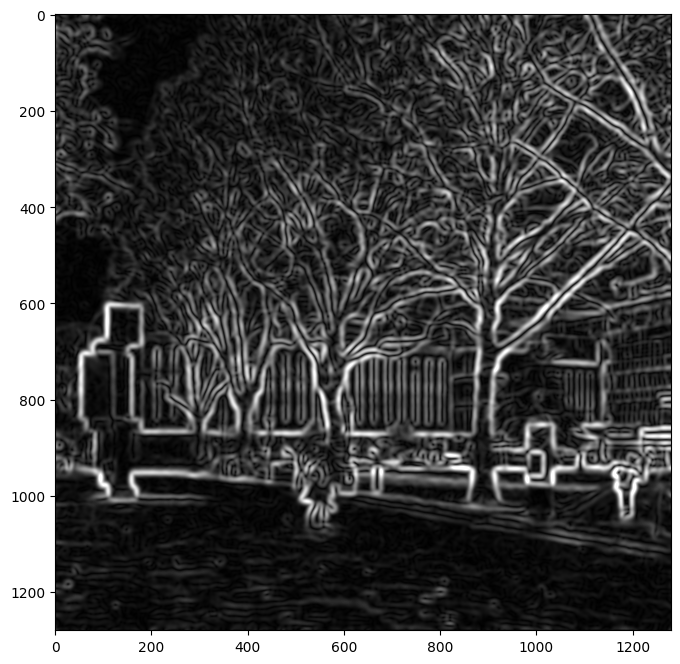

In [19]:
# Perform separable Gaussian smoothing and count time
start_time_separable = time.time()

# Image filtering
#x axis
h_x = gaussian_filter_1d(sigma)
h_x = h_x.reshape((1, -1))  # Reshape to (1, sz) for convolution along x-axis
image_smoothed_x = convolve(image_noisy, h_x, mode='nearest')
#y axis
h_y = gaussian_filter_1d(sigma)
h_y = h_y.reshape((-1, 1))  # Reshape to (sz, 1) for convolution along y-axis
image_smoothed_separable = convolve(image_smoothed_x, h_y, mode='nearest')

end_time_separable = time.time()
print(f"Separable Gaussian smoothing time: {end_time_separable - start_time_separable} seconds")

gradient_x_separable = convolve(image_smoothed_separable, sobel_x)
gradient_y_separable = convolve(image_smoothed_separable, sobel_y)

# Calculate the gradient magnitude
grad_mag2 = np.sqrt(gradient_x_separable**2 + gradient_y_separable**2)

# Display the gradient magnitude map (provided)
plt.imshow(grad_mag2, cmap='gray', vmin=0, vmax=100)
plt.gcf().set_size_inches(8, 8)

# Check the difference between the current gradient magnitude map
# and the previous one produced without separable filtering. You
# can report the mean difference between the two.
mean_difference = np.mean(np.abs(grad_mag2 - grad_mag))
print(f"Mean difference between gradient magnitude maps: {mean_difference}")


### 2.7 Comment on the Gaussian + Sobel filtering results and the computational time.

In [ ]:
The Gaussian filter applied first helps to smooth the image, reducing noise and creating a more uniform intensity 
distribution.
Sobel filtering is then applied to the smoothed image.
The use of separable Gaussian filters significantly improves the efficiency of Gaussian smoothing.
By combining separable Gaussian smoothing with Sobel filtering, the overall computational time is likely to be 
lower compared to directly applying a 2D Gaussian filter followed by Sobel filtering. 

Results:
    
The results indicate that the separable Gaussian smoothing was performed relatively quickly, taking only 
0.094 seconds. Additionally, the mean difference between the gradient magnitude maps before and after the 
separable Gaussian filtering is extremely small, at approximately 4.3x10^-13.

## 3. Challenge: Implement 2D image filters using Pytorch (24 points).

[Pytorch](https://pytorch.org/) is a machine learning framework that supports filtering and convolution.

The [Conv2D](https://pytorch.org/docs/stable/nn.html#conv2d) operator takes an input array of dimension NxC1xXxY, applies the filter and outputs an array of dimension NxC2xXxY. Here, since we only have one image with one colour channel, we will set N=1, C1=1 and C2=1. You can read the documentation of Conv2D for more detail.

In [4]:
# Import libaries (provided)
import torch
import torch.nn.functional as F
import torch.nn as nn

### 3.1 Expand the dimension of the noisy image into 1x1xXxY and convert it to a Pytorch tensor.

In [8]:
# expand the dimension of the numpy array
expanded_image = np.expand_dims(image_noisy, axis=(0, 1))

# convert to a PyTorch tensor using torch.from_numpy
torch_tensor = torch.from_numpy(expanded_image)

# print the shape of the resulting PyTorch tensor
print("Shape of the PyTorch tensor:", torch_tensor.shape)

Shape of the PyTorch tensor: torch.Size([1, 1, 1280, 1280])


### 3.2 Create a Pytorch Conv2D filter, set its kernel to be a 2D Gaussian filter and perform filtering.

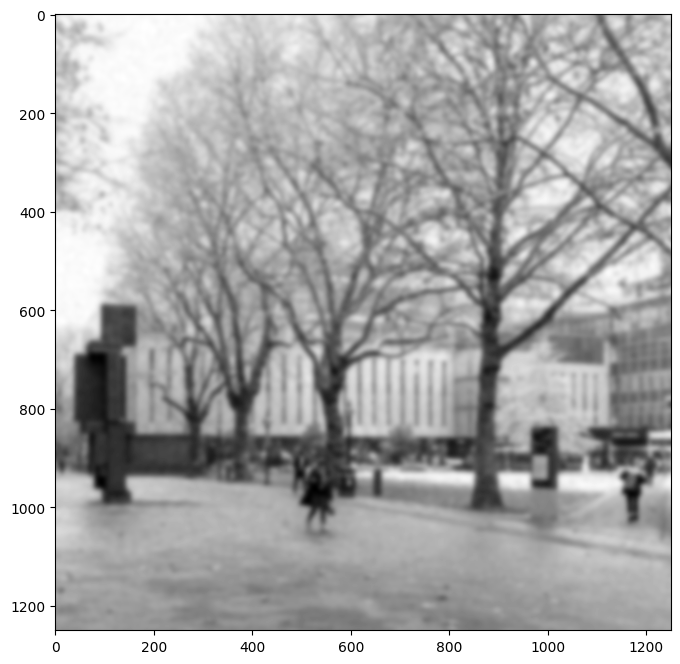

In [12]:
# A 2D Gaussian filter when sigma = 5 pixel
sigma = 5
h = gaussian_filter_2d(sigma)

# convert the Gaussian filter to a PyTorch tensor
filter_tensor = torch.from_numpy(h).float().unsqueeze(0).unsqueeze(0)

# create the Conv2D filter
conv2d_filter = torch.nn.Conv2d(1, 1, kernel_size=h.shape, bias=False)
conv2d_filter.weight.data = filter_tensor

# convert the noisy image to a PyTorch tensor
image_tensor = torch.from_numpy(image_noisy).float().unsqueeze(0).unsqueeze(0)

# perform filtering
filtered_tensor = conv2d_filter(image_tensor)

# convert the filtered tensor back to a NumPy array
image_filtered = filtered_tensor.squeeze().detach().numpy()

# cisplay the filtering result
plt.imshow(image_filtered, cmap='gray')
plt.gcf().set_size_inches(8, 8)
plt.show()

### 3.3 Implement Pytorch Conv2D filters to perform Sobel filtering on Gaussian smoothed images, show the gradient magnitude map.

In [20]:
# Convert the smoothed image to a PyTorch tensor
image_smoothed_tensor = torch.from_numpy(image_smoothed_separable).float().unsqueeze(0).unsqueeze(0)

# Define Sobel filters for x and y directions
sobel_x_filter = torch.FloatTensor([[1, 0, -1], [2, 0, -2], [1, 0, -1]])
sobel_y_filter = torch.FloatTensor([[1, 2, 1], [0, 0, 0], [-1, -2, -1]])

# Create Conv2D filters for Sobel operators
conv2d_sobel_x = nn.Conv2d(1, 1, kernel_size=3, bias=False)
conv2d_sobel_x.weight.data = sobel_x_filter.view(1, 1, 3, 3)

conv2d_sobel_y = nn.Conv2d(1, 1, kernel_size=3, bias=False)
conv2d_sobel_y.weight.data = sobel_y_filter.view(1, 1, 3, 3)

# Perform filtering using Conv2D filters
gradient_x_tensor = conv2d_sobel_x(image_smoothed_tensor)
gradient_y_tensor = conv2d_sobel_y(image_smoothed_tensor)

# Calculate the gradient magnitude map
grad_mag3 = torch.sqrt(gradient_x_tensor**2 + gradient_y_tensor**2).squeeze().detach().numpy()

# Visualize the gradient magnitude map
plt.imshow(grad_mag3, cmap='gray', vmin=0, vmax=100)
plt.gcf().set_size_inches(8, 8)
plt.show()